In [1]:
from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
max_len = 11
buckets = 20

save_data_to_array(max_len=max_len, n_mfcc=buckets)


Saving vectors of label - 'nine': 100%|██████████| 200/200 [00:03<00:00, 50.17it/s]


In [3]:
X_train, X_test, y_train, y_test = get_train_test()

In [4]:
channels = 1
epochs = 10
batch_size = 512

num_classes = 10

X_train = X_train.reshape(X_train.shape[0], buckets, max_len, channels)
X_test = X_test.reshape(X_test.shape[0], buckets, max_len, channels)

4.0


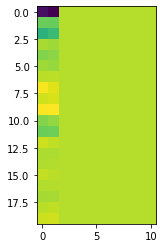

In [5]:
plt.imshow(X_train[100, :, :, 0])
print(y_train[100])

In [6]:
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [7]:
model = Sequential()
model.add(Conv2D(32,
    (3,3),
    input_shape=(buckets, max_len,1),
    activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train_hot, epochs=epochs, validation_data=(X_test, y_test_hot))

Train on 1200 samples, validate on 800 samples
Epoch 1/10
1200/1200 [==============================] - ETA: 1:15 - loss: 4.5960 - accuracy: 0.09 - ETA: 17s - loss: 3.8499 - accuracy: 0.1016 - ETA: 6s - loss: 3.1272 - accuracy: 0.153 - ETA: 3s - loss: 2.8364 - accuracy: 0.20 - ETA: 1s - loss: 2.5709 - accuracy: 0.24 - ETA: 0s - loss: 2.4093 - accuracy: 0.28 - ETA: 0s - loss: 2.2975 - accuracy: 0.29 - 3s 2ms/step - loss: 2.2710 - accuracy: 0.3017 - val_loss: 1.7786 - val_accuracy: 0.3787
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 1.4717 - accuracy: 0.59 - ETA: 0s - loss: 1.4883 - accuracy: 0.46 - ETA: 0s - loss: 1.4762 - accuracy: 0.48 - ETA: 0s - loss: 1.4585 - accuracy: 0.48 - ETA: 0s - loss: 1.4103 - accuracy: 0.51 - ETA: 0s - loss: 1.3878 - accuracy: 0.52 - ETA: 0s - loss: 1.3434 - accuracy: 0.53 - 0s 404us/step - loss: 1.3290 - accuracy: 0.5358 - val_loss: 1.2022 - val_accuracy: 0.5925
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - los

In [9]:
model.save('cnn_mfcc.h5')

In [10]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [11]:
def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    plt.figure(figsize = (10,7))
    sn.heatmap(df_cmx, annot=True)
    plt.show()

In [12]:
y_testPred = model.predict(X_test)
y_testP = []
for x in y_testPred:
    y_testP.append(x.argmax())
y_testP = np.array(y_testP)

In [13]:
print(y_test[0])

9.0


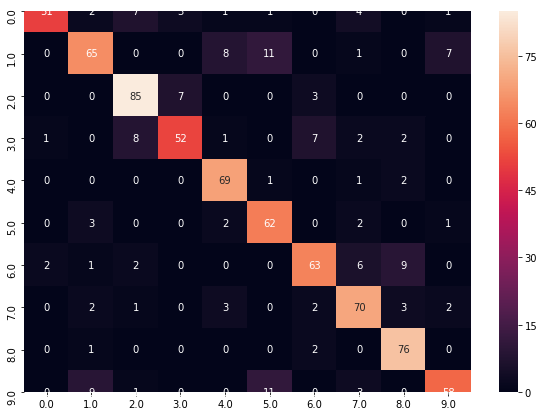

              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82        70
         1.0       0.78      0.71      0.74        92
         2.0       0.82      0.89      0.85        95
         3.0       0.84      0.71      0.77        73
         4.0       0.82      0.95      0.88        73
         5.0       0.72      0.89      0.79        70
         6.0       0.82      0.76      0.79        83
         7.0       0.79      0.84      0.81        83
         8.0       0.83      0.96      0.89        79
         9.0       0.84      0.71      0.77        82

    accuracy                           0.81       800
   macro avg       0.82      0.81      0.81       800
weighted avg       0.82      0.81      0.81       800



In [14]:
from sklearn.metrics import classification_report

print_cmx(y_test, y_testP)
print(classification_report(y_test, y_testP))

In [1]:
from keras import backend as K
for l in range(len(model.layers)):
    print(l, model.layers[l])
print(model.summary())

Using TensorFlow backend.


NameError: name 'model' is not defined

In [16]:
getFeature = K.function([model.layers[0].input, K.learning_phase()],
                        [model.layers[5].output])

In [17]:
getPrediction = K.function([model.layers[6].input, K.learning_phase()],
                           [model.layers[6].output])

In [18]:
X_test.shape

(800, 20, 11, 1)

In [19]:
exTrain3000 = getFeature([X_train[:4000], 0])[0]

In [20]:
exTest1000 = getFeature([X_test[:2500], 0])[0]

In [21]:
y_train3000 = y_train[:4000].reshape(y_train[:4000].shape[0],)
y_test1000 = y_test[:2500]

In [22]:
print(exTrain3000.shape, exTest1000.shape, y_train3000.shape, y_test1000.shape)

(1200, 128) (800, 128) (1200,) (800,)


In [32]:
print(exTrain3000)

[[0.         0.         0.         ... 0.47528127 4.0973244  0.        ]
 [5.5350575  0.         0.         ... 0.         0.         0.        ]
 [1.4345114  3.2929642  0.         ... 1.6892583  5.47305    0.        ]
 ...
 [4.4490833  0.         0.         ... 1.2450867  0.34050766 0.        ]
 [1.234363   0.         0.         ... 2.2126234  3.0419345  0.        ]
 [6.6850443  3.370598   4.4481654  ... 0.         1.4556174  0.        ]]


In [33]:
print(X_train)

[[[[-317.99393   ]
   [-312.06168   ]
   [   0.        ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  [[ -19.601395  ]
   [ -14.143058  ]
   [   0.        ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  [[ -75.389496  ]
   [ -82.84297   ]
   [   0.        ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  ...

  [[   2.778596  ]
   [   7.059886  ]
   [   0.        ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  [[  -3.6471705 ]
   [   2.8368034 ]
   [   0.        ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  [[  -0.93702656]
   [   3.6483896 ]
   [   0.        ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]]


 [[[-317.73788   ]
   [-336.1423    ]
   [   0.        ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  [[ -68.72513   ]
   [ -57.176865  ]
   [   0.        ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  [[ -4

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": [10],
              "weights": [ 'distance'],
              "metric": ['euclidean','manhattan'],
              "algorithm": ['auto']}
kclf = KNeighborsClassifier()
kgclf = GridSearchCV(kclf, param_grid=parameters)
kgclf.fit(exTrain3000, y_train3000)

C:\Users\cc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [10], 'weights': ['distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
kclf = kgclf.best_estimator_
kclf.fit(exTrain3000, y_train3000)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

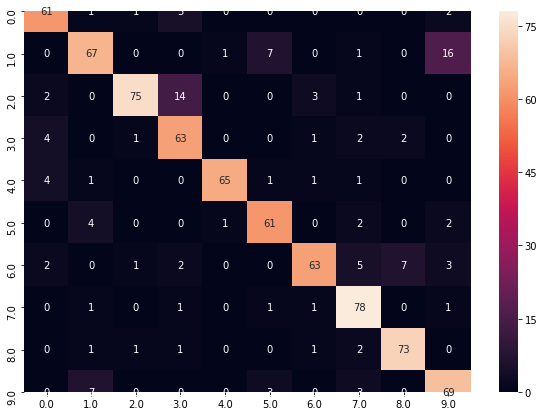

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85        70
         1.0       0.82      0.73      0.77        92
         2.0       0.95      0.79      0.86        95
         3.0       0.73      0.86      0.79        73
         4.0       0.97      0.89      0.93        73
         5.0       0.84      0.87      0.85        70
         6.0       0.90      0.76      0.82        83
         7.0       0.82      0.94      0.88        83
         8.0       0.89      0.92      0.91        79
         9.0       0.74      0.84      0.79        82

    accuracy                           0.84       800
   macro avg       0.85      0.85      0.85       800
weighted avg       0.85      0.84      0.84       800



In [25]:
y_testKNN = kclf.predict(exTest1000)

from sklearn.metrics import confusion_matrix, classification_report

print_cmx(y_test1000, y_testKNN)
print(classification_report(y_test1000, y_testKNN))

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['rbf'], 
              'C':[1, 10, 100, 1000],
              'gamma':[1e-3, 1e-4]}
clf = GridSearchCV(SVC(), parameters)
clf.fit(exTrain3000, y_train3000)

C:\Users\cc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [27]:
svmclf = clf.best_estimator_
svmclf.fit(exTrain3000, y_train3000)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

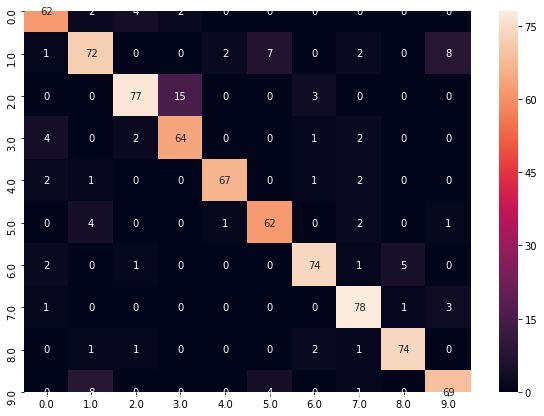

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87        70
         1.0       0.82      0.78      0.80        92
         2.0       0.91      0.81      0.86        95
         3.0       0.79      0.88      0.83        73
         4.0       0.96      0.92      0.94        73
         5.0       0.85      0.89      0.87        70
         6.0       0.91      0.89      0.90        83
         7.0       0.88      0.94      0.91        83
         8.0       0.93      0.94      0.93        79
         9.0       0.85      0.84      0.85        82

    accuracy                           0.87       800
   macro avg       0.87      0.88      0.88       800
weighted avg       0.88      0.87      0.87       800



In [28]:
y_testSVM = svmclf.predict(exTest1000)

from sklearn.metrics import confusion_matrix, classification_report

print_cmx(y_test1000, y_testSVM)
print(classification_report(y_test1000, y_testSVM))

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth": [3, None],
              "max_features": [10],
              "min_samples_split": [1.0, 3, 10],
              "min_samples_leaf": [10],
              "bootstrap": [True, False],
              "criterion": ["entropy"],
              "n_estimators": [50]}
rclf = RandomForestClassifier()
rgclf = GridSearchCV(rclf, param_grid=parameters)
rgclf.fit(exTrain3000, y_train3000)

C:\Users\cc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [30]:
rclf = rgclf.best_estimator_
rclf.fit(exTrain3000, y_train3000)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

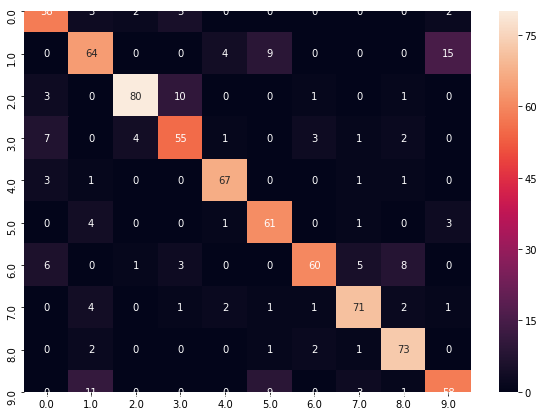

              precision    recall  f1-score   support

         0.0       0.75      0.83      0.79        70
         1.0       0.72      0.70      0.71        92
         2.0       0.92      0.84      0.88        95
         3.0       0.74      0.75      0.75        73
         4.0       0.89      0.92      0.91        73
         5.0       0.75      0.87      0.81        70
         6.0       0.90      0.72      0.80        83
         7.0       0.86      0.86      0.86        83
         8.0       0.83      0.92      0.87        79
         9.0       0.73      0.71      0.72        82

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



In [31]:
y_testRF = rclf.predict(exTest1000)

from sklearn.metrics import confusion_matrix, classification_report

print_cmx(y_test1000, y_testRF)
print(classification_report(y_test1000, y_testRF))